### Electromagnetic field of a point charge moving in the space

In [1]:
# Libraries
import pycharge as pc # Provides the Liénard-Wiechert fields
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('classic')

In [2]:
def electromagnetic_field(t, x, y, z, simulation: pc.Simulation): # Function to compute the electromagnetic field

    def normalize(field_array): # Normalizer function (helper function for plotting)
        magnitude_array = []

        for field in field_array:
            magnitude = np.sqrt(field[0] ** 2 + field[1] ** 2 + field[2] ** 2) # Magnitude at time t
            magnitude_array.append(magnitude)

        magnitude_array = np.array(magnitude_array) # Conversion from list to NumPy array
        max_magnitude = magnitude_array.max()
        
        return field_array / max_magnitude # Normalized field with the greatest magnitude

    E_array = []
    B_array = []

    for time in t: # Computing the electromagnetic field

        E = simulation.calculate_E(time, x, y, z) # E
        E_array.append(E)

        B = simulation.calculate_B(time, x, y, z) # B
        B_array.append(B)

    # Conversion from lists to NumPy arrays
    E_array = np.array(E_array)
    B_array = np.array(B_array)

    # Using the helper function
    E_array = normalize(E_array)
    B_array = normalize(B_array)

    return (E_array, B_array)

def animation(t, x_X, y_Y, z_Z, E_array, B_array, file: str): # Animation function

    # Figure and initial quiver plot
    fig = plt.figure(figsize = (12, 12))
    ax = fig.add_subplot(111, projection = '3d')

    def update(frame): # Animation update function
        ax.clear()

        # Select E and B at t = frame
        E = E_array[frame]
        B = B_array[frame]

        # Plot the fields
        ax.quiver(x_X, y_Y, z_Z, E[0], E[1], E[2], length = 0.2, color = 'blue', alpha = 0.7, label = 'Electric field')
        ax.quiver(x_X, y_Y, z_Z, B[0], B[1], B[2], length = 0.2, color = 'green', alpha = 0.7, label = 'Magnetic field')
        
        ax.set_title(f'Time: {t[frame]:.2e} s')
        ax.set_xlabel(r'$x / X$')
        ax.set_ylabel(r'$y / Y$')
        ax.set_zlabel(r'$z / Z$')
        ax.legend()
        
        return ax

    ani = FuncAnimation(fig, update, frames = len(t), interval = 50, blit = False) # Creating an animation
    ani.save(file + '.gif', writer = 'pillow', fps = 20) # Saving the animation as a GIF

    return None

In [3]:
# PyCharge classes
c = 299_792_458.0
speed = c / 1000
charge1 = pc.LinearVelocityCharge(speed = speed,
                                  init_pos = 0)

acceleration = 6e+10
charge2 = pc.LinearAcceleratingCharge(acceleration = acceleration,
                                      stop_t = None)

origin = (0, 0, 0)
direction = (1, 0, 0)
amplitude = 1
omega = 2 * np.pi / 1e-05
charge3 = pc.OscillatingCharge(origin = origin,
                               direction = direction,
                               amplitude = amplitude,
                               omega = omega,
                               start_zero = False)

simulation1 = pc.Simulation(charge1)
simulation2 = pc.Simulation(charge2)
simulation3 = pc.Simulation(charge3)

In [4]:
# Defining the time array
T, delta_t = (1e-05, 1e-07)
t = np.arange(0, T, delta_t)

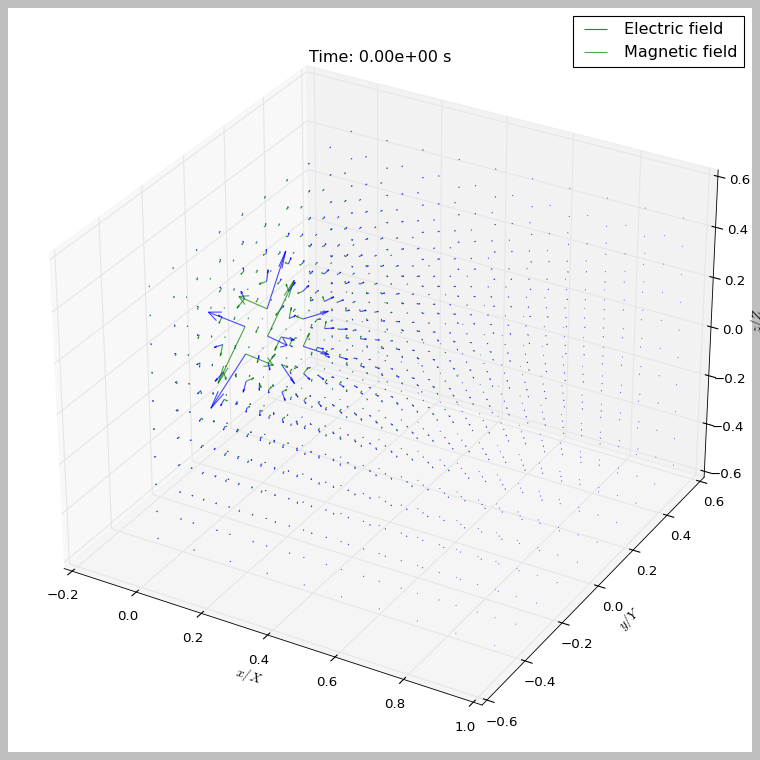

In [5]:
# Electromagnetic field produced by a particle with constant velocity
xmin = - speed * delta_t
xmax = speed * (T + delta_t)
XYZ = xmax - xmin

yzmin = - XYZ / 2
yzmax = - yzmin

x = np.linspace(xmin, xmax, 10)
yz = np.linspace(yzmin, yzmax, 10)
x, y, z = np.meshgrid(x, yz, yz, indexing = 'ij')

E, B = electromagnetic_field(t, x, y, z, simulation1)
animation(t, x / XYZ, y / XYZ, z / XYZ, E, B, 'Constant velocity charge field')

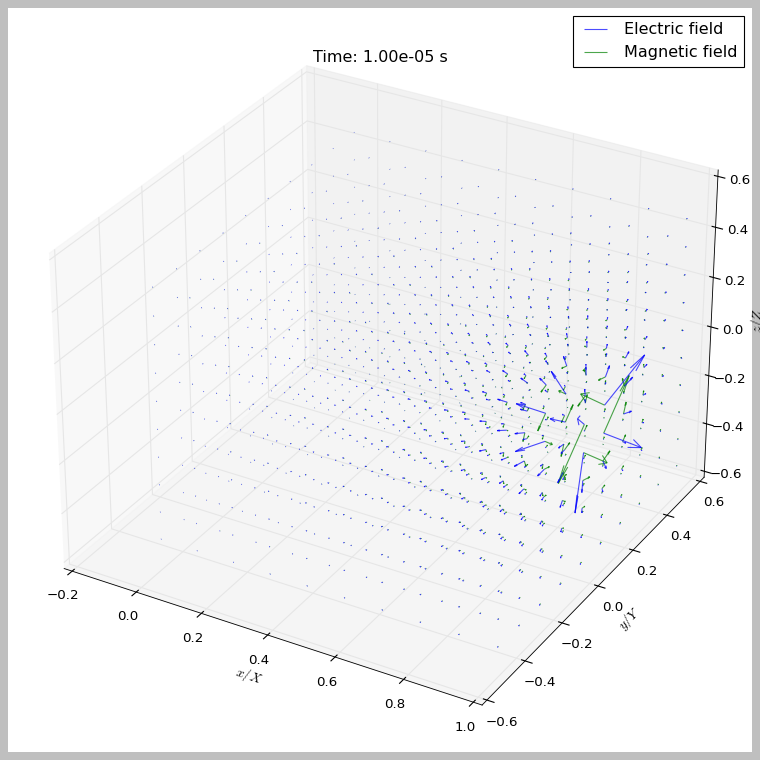

In [6]:
# Electromagnetic field produced by a particle with constant acceleration
xmin = - 0.5 * acceleration * (delta_t ** 2)
xmax = 0.5 * acceleration * ((T + delta_t) ** 2)
XYZ = xmax - xmin

yzmin = - XYZ / 2
yzmax = - yzmin

x = np.linspace(xmin, xmax, 10)
yz = np.linspace(yzmin, yzmax, 10)
x, y, z = np.meshgrid(x, yz, yz, indexing = 'ij')

E, B = electromagnetic_field(t, x, y, z, simulation2)
animation(t, x / XYZ, y / XYZ, z / XYZ, E, B, 'Accelerated charge field')

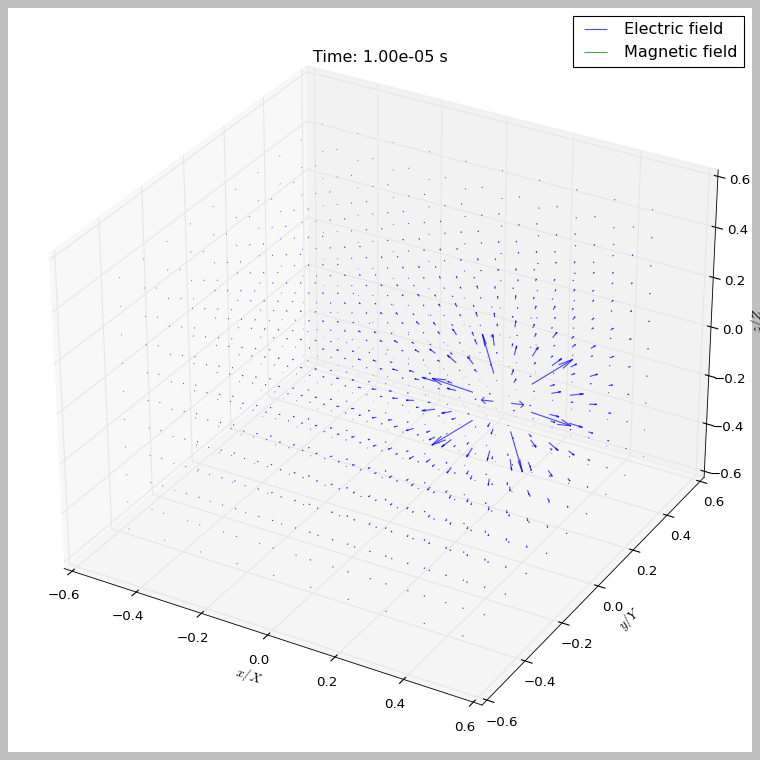

In [7]:
# Electromagnetic field produced by an oscillating particle
xmin = - 1.5 * amplitude
xmax = - xmin
XYZ = xmax - xmin

yzmin = - XYZ / 2
yzmax = - yzmin

x = np.linspace(xmin, xmax, 10)
yz = np.linspace(yzmin, yzmax, 10)
x, y, z = np.meshgrid(x, yz, yz, indexing = 'ij')

E, B = electromagnetic_field(t, x, y, z, simulation3)
animation(t, x / XYZ, y / XYZ, z / XYZ, E, B, 'Oscillating charge field')